In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
ações = ['MGLU3.SA', 'PETR3.SA', 'VVAR3.SA']
carteira = pd.DataFrame()
for i in ações:
    carteira[i] = yf.download(i, period='1y')['Adj Close']
    
carteira

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MGLU3.SA,PETR3.SA,VVAR3.SA
2020-06-02,15.344521,20.927816,13.28
2020-06-03,15.488533,21.119287,13.48
2020-06-04,15.019258,21.215023,13.95
2020-06-05,14.761033,21.875601,14.85
2020-06-08,15.488533,22.354279,15.50
...,...,...,...
2021-05-27,19.590000,25.250000,12.72
2021-05-28,20.250000,26.709999,12.72
2021-05-31,20.160000,26.650000,12.98
2021-06-01,20.350000,27.230000,13.84


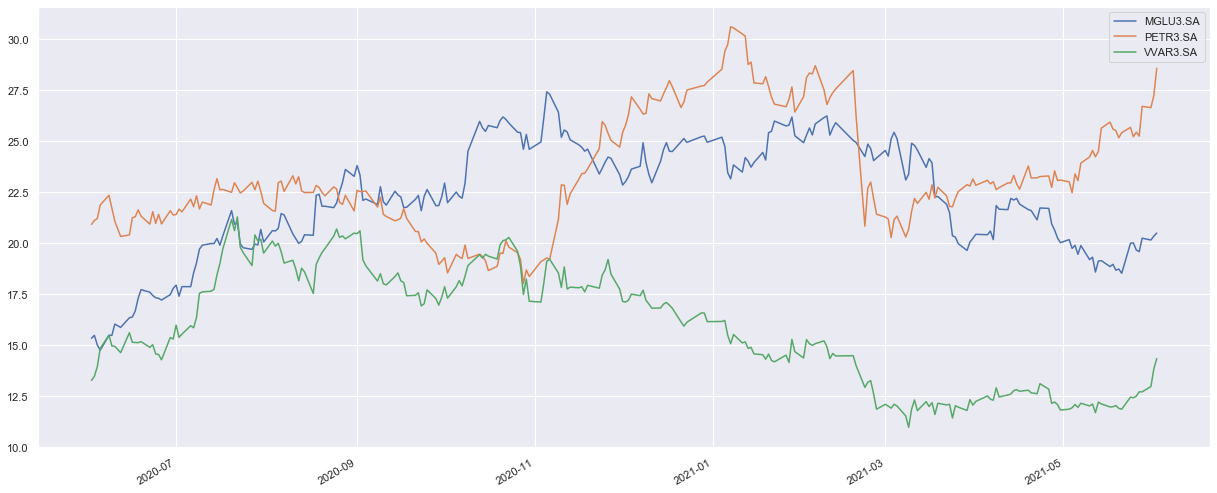

In [4]:
sns.set()
carteira.plot(figsize=(21,9))

In [5]:
retorno = carteira.pct_change()
retorno

,MGLU3.SA,PETR3.SA,VVAR3.SA
2020-06-02,NaN,NaN,NaN
2020-06-03,0.009385,0.009149,0.015060
2020-06-04,-0.030298,0.004533,0.034866
2020-06-05,-0.017193,0.031137,0.064516
2020-06-08,0.049285,0.021882,0.043771
...,...,...,...
2021-05-27,-0.004067,-0.007859,0.016787
2021-05-28,0.033691,0.057822,0.000000
2021-05-31,-0.004444,-0.002246,0.020440
2021-06-01,0.009425,0.021764,0.066256


In [6]:
retorno_anual = retorno.mean() * 264 # no ano
retorno_anual

MGLU3.SA    0.395728
PETR3.SA    0.443765
VVAR3.SA    0.204263
dtype: float64

In [7]:
cov = retorno.cov() * 264 # no ano
cov

,MGLU3.SA,PETR3.SA,VVAR3.SA
MGLU3.SA,0.171027,0.018312,0.120000
PETR3.SA,0.018312,0.213260,0.076745
VVAR3.SA,0.120000,0.076745,0.244349


In [8]:
corr = retorno.corr()
corr

,MGLU3.SA,PETR3.SA,VVAR3.SA
MGLU3.SA,1.000000,0.095883,0.587008
PETR3.SA,0.095883,1.000000,0.336195
VVAR3.SA,0.587008,0.336195,1.000000


In [9]:
num_acoes = len(ações)
num_carteiras = 1000

In [10]:
peso = np.random.random(num_acoes)
peso /= np.sum(peso)
peso

array([0.11874591, 0.36407529, 0.5171788 ])

In [11]:
retorno_esperado = np.dot(peso, retorno_anual)
retorno_esperado

0.31419557749671057

In [13]:
vol = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
vol

0.37584553201055393

In [14]:
sharpe_ratio = retorno_esperado/vol
sharpe_ratio

0.8359699683429729

In [15]:
retorno_esperado = np.array([retorno_esperado])
vol = np.array([vol])
sharpe_ratio = np.array([sharpe_ratio])
dic_carteira = {'Retorno': retorno_esperado, 'Volatilidade':vol, 'Sharpe Ratio':sharpe_ratio}

In [16]:
portfolio = pd.DataFrame(dic_carteira)
portfolio

,Retorno,Volatilidade,Sharpe Ratio
0,0.314196,0.375846,0.83597


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


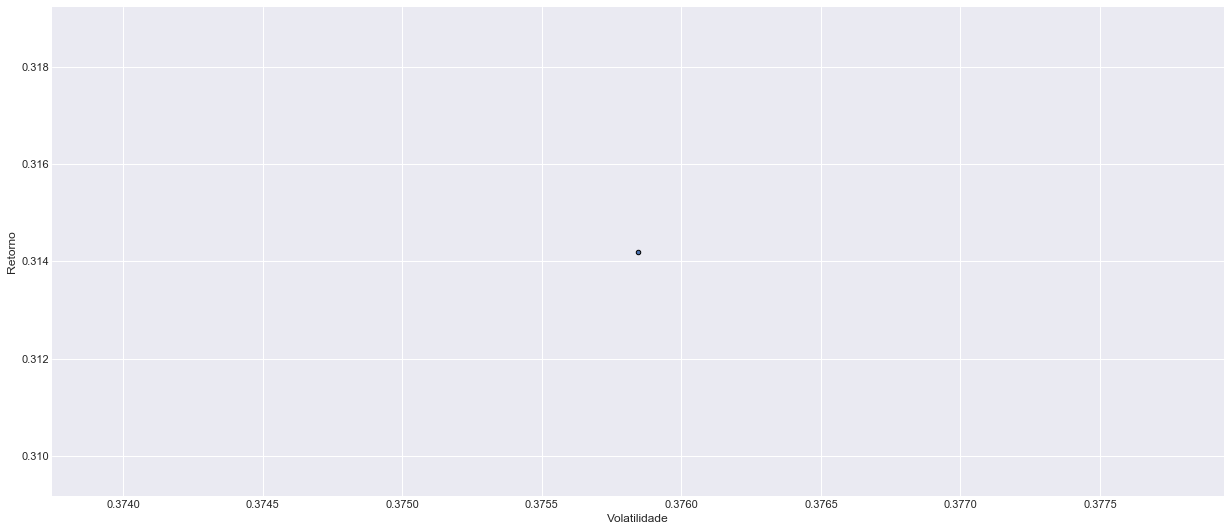

In [20]:
plt.style.use('seaborn-dark')
portfolio.plot.scatter(x='Volatilidade', y='Retorno', cmap='RdY1Gn', edgecolors='black', figsize=(21,9), grid=True)

In [21]:
lista_retornos = []
lista_vol = []
lista_pesos = []
lista_sharpe_ratio = []

In [26]:
num_carteiras = 100000

for carteira in range(num_carteiras):
    peso = np.random.random(num_acoes)
    peso /= np.sum(peso)
    lista_pesos.append(peso)
    
    retorno_esperado = np.dot(peso, retorno_anual)
    lista_retornos.append(retorno_esperado)
    
    vol = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
    lista_vol.append(vol)
    
    sharpe_ratio = retorno_esperado/vol
    lista_sharpe_ratio.append(sharpe_ratio)

In [35]:
dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade':lista_vol, 'Sharpe Ratio':lista_sharpe_ratio}
for contar, acao in enumerate(ações):
    dic_carteiras[acao+' Peso'] = [Peso[contar] for Peso in lista_pesos]


portfolios = pd.DataFrame(dic_carteiras)
colunas = ['Retorno', 'Volatilidade', "Sharpe Ratio"] + [acao+ 'Peso' for acao in ações]
portfolios.columns = colunas
portfolios

,Retorno,Volatilidade,Sharpe Ratio,MGLU3.SAPeso,PETR3.SAPeso,VVAR3.SAPeso
0,0.346758,0.345577,1.003416,0.285280,0.366900,0.347820
1,0.403724,0.328706,1.228222,0.400131,0.512938,0.086932
2,0.301500,0.397403,0.758677,0.467716,0.032090,0.500193
3,0.350976,0.341472,1.027832,0.331310,0.347716,0.320974
4,0.270166,0.415530,0.650171,0.035980,0.246401,0.717619
...,...,...,...,...,...,...
100995,0.393204,0.362136,1.085791,0.178430,0.646249,0.175321
100996,0.372730,0.361094,1.032224,0.150597,0.583013,0.266390
100997,0.383492,0.331312,1.157494,0.355801,0.463900,0.180298
100998,0.343333,0.363024,0.945758,0.135845,0.472064,0.392090


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


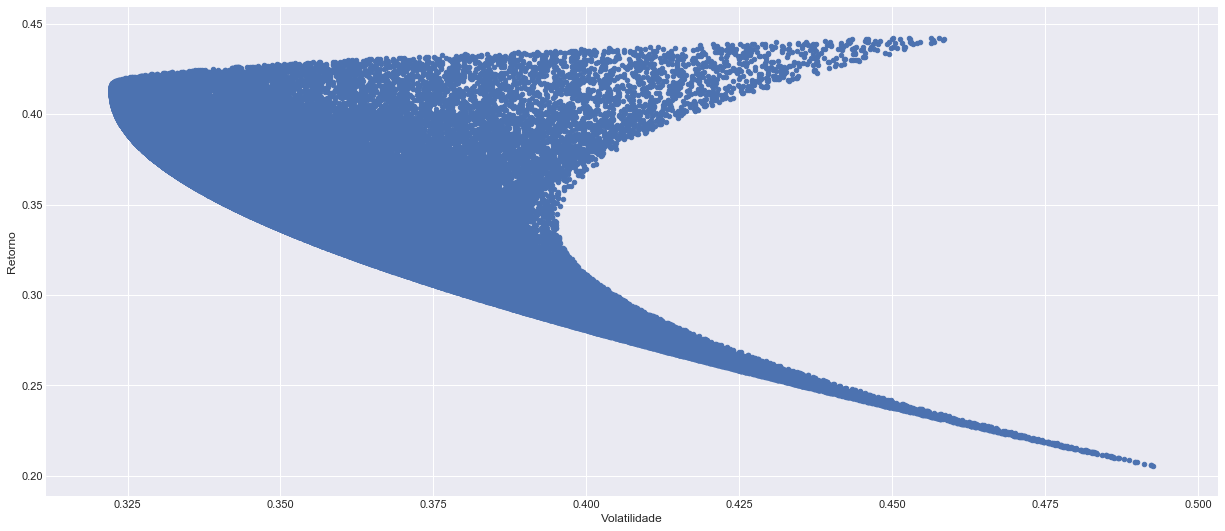

In [36]:
portfolios.plot.scatter(x='Volatilidade', y='Retorno', figsize=(21,9), grid=True)

In [37]:
menor_vol = portfolios['Volatilidade'].min()
carteira_min_variancia = portfolios.loc[portfolios['Volatilidade'] == menor_vol]
carteira_min_variancia

,Retorno,Volatilidade,Sharpe Ratio,MGLU3.SAPeso,PETR3.SAPeso,VVAR3.SAPeso
49925,0.412831,0.32231,1.280851,0.547553,0.43311,0.019337


In [38]:
maior_sharpe = portfolios['Sharpe Ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
carteira_maior_sharpe

,Retorno,Volatilidade,Sharpe Ratio,MGLU3.SAPeso,PETR3.SAPeso,VVAR3.SAPeso
42056,0.418485,0.32308,1.295299,0.525134,0.474638,0.000228


In [39]:
carteira_min_variancia.T

,49925
Retorno,0.412831
Volatilidade,0.322310
Sharpe Ratio,1.280851
MGLU3.SAPeso,0.547553
PETR3.SAPeso,0.433110
VVAR3.SAPeso,0.019337


In [40]:
carteira_maior_sharpe.T

,42056
Retorno,0.418485
Volatilidade,0.323080
Sharpe Ratio,1.295299
MGLU3.SAPeso,0.525134
PETR3.SAPeso,0.474638
VVAR3.SAPeso,0.000228
